In [1]:
clc
clear

In [2]:
s_noise = load('/rds/general/user/ip620/home/mri_fyp/brain/sequence/short_no_noise.mat');
s_noise = s_noise.one_no_noise;
l_noise = load('/rds/general/user/ip620/home/mri_fyp/brain/sequence/long_no_noise.mat');
l_noise = l_noise.two_no_noise;
l = load('/rds/general/user/ip620/home/mri_fyp/brain/sequence/resultImage_TE1750us_TI360ms.mat');
l = l.resultImage;



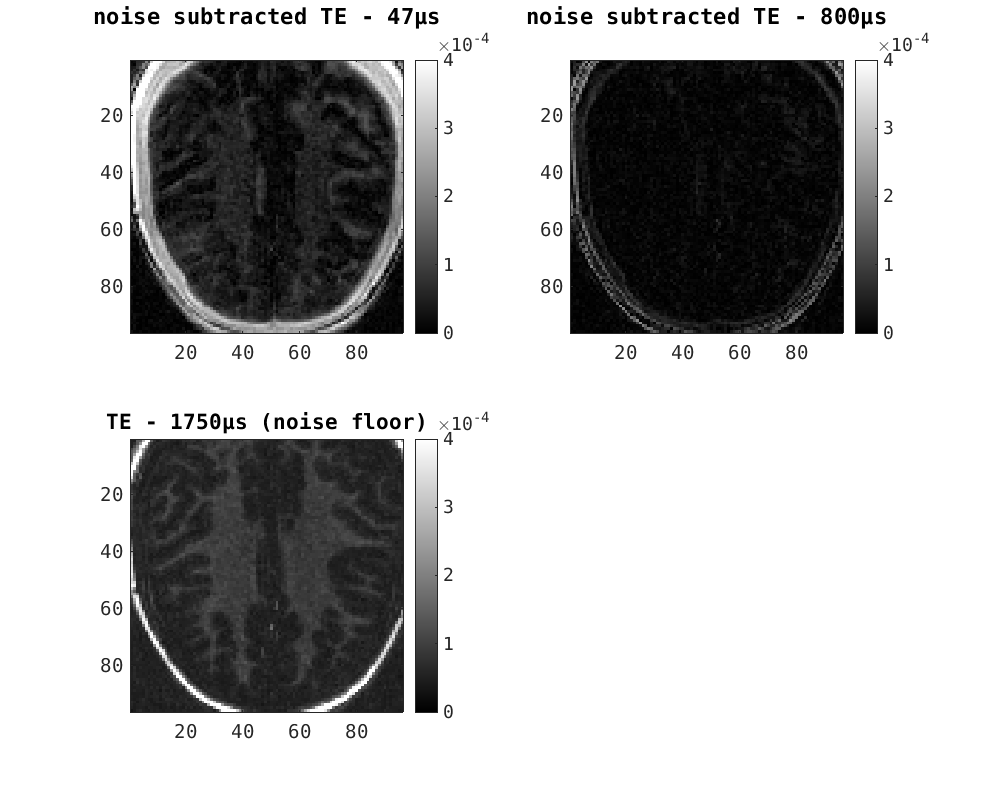

Figure saved as: /rds/general/user/ip620/home/mri_fyp/brain/sequence/full_figure.jpg


In [3]:
images_no_noise = {s_noise, l_noise, l};  % Your image volumes
image_names = {'noise subtracted TE - 47µs', 'noise subtracted TE - 800µs', 'TE - 1750µs (noise floor)'};  % Names of the variables

% Variable to control which slice to display
sliceNumber = 25;  % Example: middle slice is 48 in a 96x96x96 volume (can be modified)

% Variable to control the axis (1 = x-axis, 2 = y-axis, 3 = z-axis)
axisChoice = 3;  % 1 for x-axis, 2 for y-axis, 3 for z-axis

% Create a figure for subplots
fig = figure('Name', 'Image Slices', 'NumberTitle', 'off', 'Position', [100, 100, 1000, 800]);
% Create tiled layout with reduced spacing
tiledlayout(2, 2, 'Padding', 'tight', 'TileSpacing', 'compact');
% Loop through each image and display the middle slice
for i = 1:length(images_no_noise)
    % Extract the image volume
    img = images_no_noise{i};
    
    % Get the slice based on the chosen axis
    switch axisChoice
        case 1  % x-axis (slice along x, looking at y and z)
            slice = squeeze(img(sliceNumber, :, :));
        case 2  % y-axis (slice along y, looking at x and z)
            slice = squeeze(img(:, sliceNumber, :));
        case 3  % z-axis (slice along z, looking at x and y)
            slice = squeeze(img(:, :, sliceNumber));
        otherwise
            error('Invalid axis choice. Use 1 for x, 2 for y, or 3 for z.');
    end
    
     % Create subplot for each image slice
    subplot(2, 2, i);  % 1 row, 2 columns
    imagesc(abs(slice));  % Display image slice
    axis image;
    colormap('gray');
    title(image_names{i}, 'FontSize', 16);  % Title with the variable name
    colorbar;
    set(gca, 'FontSize', 14);  % Increase font size for axes and colorbar
    
    % Set color limits to [0, 9e-5]
    caxis([0, 4e-4]);


    if i~= 3
    % Add title and adjust its position
    t = title(image_names{i}, 'FontSize', 16);
    titlePosition = get(t, 'Position');  % Get current title position
    titlePosition(2) = titlePosition(2) -9;  % Adjust Y-position upward
    set(t, 'Position', titlePosition);  % Update the title position
    end
end

% After plotting all subplots, save the whole figure
save_path = fullfile('/rds/general/user/ip620/home/mri_fyp/brain/sequence', 'full_figure.jpg');  % Save to the current working directory
exportgraphics(gcf, save_path, 'Resolution', 300);  % 300 DPI

% Confirm figure is saved
disp(['Figure saved as: ' save_path]);


Invalid text character. Check for unsupported symbol, invisible character, or pasting of non-ASCII characters.